In [23]:
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet
df_btc = pd.read_csv("./input/BitcoinVisuals.com_BTCUSD.csv")
df_btc.head()


,DateTime,Price,SMA (200)
0,2010-07-17 00:00:00,0.05,NaN
1,2010-07-18 00:00:00,0.07,NaN
2,2010-07-19 00:00:00,0.09,NaN
3,2010-07-20 00:00:00,0.08,NaN
4,2010-07-21 00:00:00,0.07,NaN


In [24]:
df_btc = df_btc[["DateTime", "Price"]]  
df_btc.head()
df_btc['DateTime'] = pd.to_datetime(df_btc['DateTime'])
df_btc.rename(columns={"DateTime": "ds", "Price": "y"}, inplace=True)
df_btc.resample('D', on='ds').mean()
df_btc=df_btc.dropna()
df_btc.tail()


,ds,y
3981,2021-06-10,36900.11
3982,2021-06-11,37092.93
3983,2021-06-12,35668.44
3984,2021-06-13,35892.61
3985,2021-06-14,39592.50


In [25]:
def addGain(df):
    df['next'] = df['y'].shift(-1)
    df['perc'] = 100*(df['next'] - df['y'])/df['y']
    return df

def conv_to_months(df):
    monthIndex = pd.DatetimeIndex(df.ds).to_period('M')
    df['month'] = monthIndex.month
    df_group = df.groupby(monthIndex).nth(0)#.apply(addGain)
    df_group=addGain(df_group)
    return df_group

df_btc_first_month=conv_to_months(df_btc)

df_btc_first_month.head()
#df_btc_first_month.info(verbose=True)


,ds,y,month,next,perc
ds,,,,,
2010-07,2010-07-17,0.05,7,0.06,20.000000
2010-08,2010-08-01,0.06,8,0.06,0.000000
2010-09,2010-09-01,0.06,9,0.06,0.000000
2010-10,2010-10-01,0.06,10,0.19,216.666667
2010-11,2010-11-01,0.19,11,0.21,10.526316


In [29]:
df_month=df_btc_first_month.groupby(['month']).mean()
df_month.head()


,y,next,perc
month,,,
1,5111.633636,5319.762727,17.549904
2,5319.762727,6699.301818,14.354977
3,6699.301818,7158.220000,9.266442
4,7158.220000,7602.435455,41.630715
5,7602.435455,6008.650909,31.670554


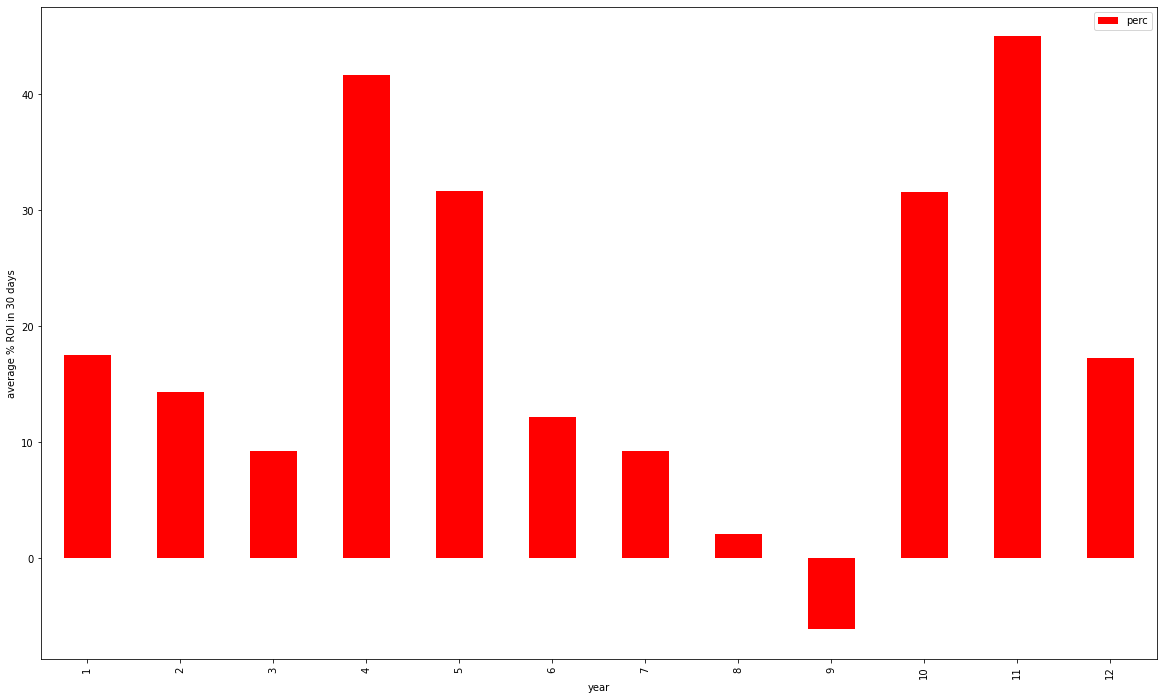

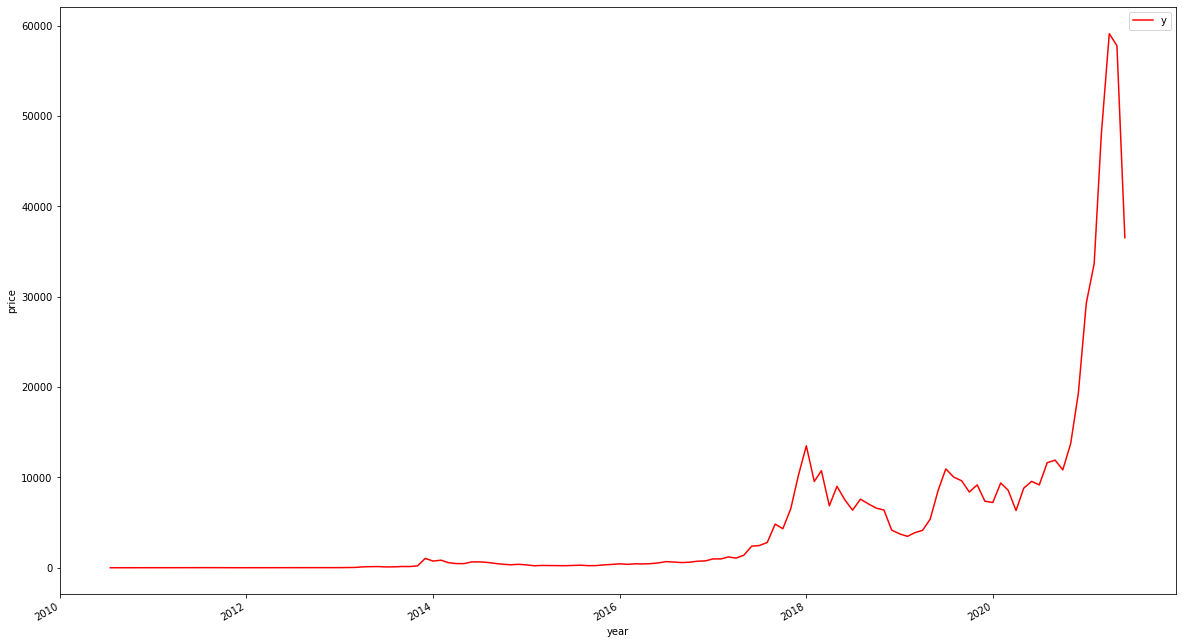

In [30]:

plt1=df_month.plot(kind='bar',y='perc',color='red',logy=1,ylabel='average % ROI in 30 days',xlabel='year',figsize=(20, 12))


ax2=df_btc_first_month.plot(kind='line',x='ds',y='y',color='red',logy=1,ylabel='price',xlabel='year',figsize=(20, 12))
